In [73]:
from operator import index

import pandas as pd
import matplotlib.pyplot as plt

The Series object is a one-dimensional data structure, resembling a list, in which each value has an associated index.

In [30]:
# Creating a Series from a list
data = [10, 20, 30, 40]
series = pd.Series(data)
print("Series from a list:\n", series)

# Creating a Series with custom index
data_with_index = pd.Series(data, index=['a', 'b', 'c', 'd'])
print("\nSeries with custom index:\n", data_with_index)

# Creating a Series from a dictionary
data_dict = {'apple': 2, 'banana': 3, 'orange': 5}
series_dict = pd.Series(data_dict)
print("\nSeries from dictionary:\n", series_dict)


Series from a list:
 0    10
1    20
2    30
3    40
dtype: int64

Series with custom index:
 a    10
b    20
c    30
d    40
dtype: int64

Series from dictionary:
 apple     2
banana    3
orange    5
dtype: int64


We can index the Series object just like a NumPy or dictionary array and perform arithmetic operations on it.

In [31]:
# Accessing values by index
print("Value at index 'b':", data_with_index['b'])

# Fancy indexing
print("\nValues at multiple indices:\n", data_with_index[['a', 'c']])

# Arithmetic operations
series1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
series2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])

# Addition
print("\nAddition of two Series:\n", series1 + series2)

# Scalar operations
print("\nSeries multiplied by 2:\n", series * 2)


Value at index 'b': 20

Values at multiple indices:
 a    10
c    30
dtype: int64

Addition of two Series:
 a    11
b    22
c    33
d    44
dtype: int64

Series multiplied by 2:
 0    20
1    40
2    60
3    80
dtype: int64


A `DataFrame` object is a two-dimensional data structure, similar to a table. It can be created from various sources, such as dictionary lists, `NumPy` arrays , etc.

In [32]:
# Creating DataFrame from dictionary
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [24, 27, 22],
    'City': ['New York', 'San Francisco', 'Los Angeles']
}
df = pd.DataFrame(data)
print("DataFrame from dictionary:\n", df)

# Creating DataFrame from list of dictionaries
data_list = [
    {'Name': 'Alice', 'Age': 24, 'City': 'New York'},
    {'Name': 'Bob', 'Age': 27, 'City': 'San Francisco'},
    {'Name': 'Charlie', 'Age': 22, 'City': 'Los Angeles'}
]
df_from_list = pd.DataFrame(data_list)
print("\nDataFrame from list of dictionaries:\n", df_from_list)

# Creating DataFrame from NumPy array
import numpy as np

array_data = np.array([[1, 2], [3, 4], [5, 6]])
df_from_array = pd.DataFrame(array_data, columns=['Column1', 'Column2'])
print("\nDataFrame from NumPy array:\n", df_from_array)


DataFrame from dictionary:
       Name  Age           City
0    Alice   24       New York
1      Bob   27  San Francisco
2  Charlie   22    Los Angeles

DataFrame from list of dictionaries:
       Name  Age           City
0    Alice   24       New York
1      Bob   27  San Francisco
2  Charlie   22    Los Angeles

DataFrame from NumPy array:
    Column1  Column2
0        1        2
1        3        4
2        5        6


We can refer to `DataFrame` columns and rows through `.loc[]`, `.iloc[]`, and directly through column names.


In [33]:
# Selecting a column
print("Column 'Age':\n", df['Age'])

# Selecting multiple columns
print("\nColumns 'Name' and 'City':\n", df[['Name', 'City']])

# Row selection by label
print("\nRow selection by label:\n", df.loc[1])

# Row selection by integer position
print("\nRow selection by integer position:\n", df.iloc[1])

# Fancy indexing
print("\nSelecting rows where Age > 23:\n", df[df['Age'] > 23])


Column 'Age':
 0    24
1    27
2    22
Name: Age, dtype: int64

Columns 'Name' and 'City':
       Name           City
0    Alice       New York
1      Bob  San Francisco
2  Charlie    Los Angeles

Row selection by label:
 Name              Bob
Age                27
City    San Francisco
Name: 1, dtype: object

Row selection by integer position:
 Name              Bob
Age                27
City    San Francisco
Name: 1, dtype: object

Selecting rows where Age > 23:
     Name  Age           City
0  Alice   24       New York
1    Bob   27  San Francisco


Extra explanation:
loc - access based on **labels** (label-based)
- loc works on the basis of **row and column labels**. We use it if we want to refer to rows or columns based on their names.
- loc allows you to select data by specifying labels, that is, column names and row indexes.
- It supports both single labels and ranges of labels.

- `iloc` - access based on **numeric indexes** (integer-based)
- `iloc` works on the basis of numeric **positions** in the DataFrame, i.e. numeric indexes.
- It is useful when you want to select data, not looking at the names, but at their positions (e.g. 1st row, 2nd row, etc.).
- `iloc` supports **numeric row and column indexes** (counting from zero).

In [34]:
data_list = [
    {'Name': 'Alice', 'Age': 24, 'City': 'New York'},
    {'Name': 'Bob', 'Age': 27, 'City': 'San Francisco'},
    {'Name': 'Charlie', 'Age': 22, 'City': 'Los Angeles'}
]
df_from_list = pd.DataFrame(data_list, index=["a", "b", "c"])

print("loc")
print("\nRow selection by label:\n", df_from_list.loc["a"])
print("\nRow selection by labels:\n", df_from_list.loc["a":"b"])
print("\nRow selection by labels and columns:\n", df_from_list.loc["a":"b", "Name":"Age"])

print("\n\niloc")
print("\nRow selection by index:\n", df_from_list.iloc[1])
print("\nRow selection by indexes:\n", df_from_list.iloc[1:3])
print("\nRow selection by indexes and columns:\n", df_from_list.iloc[1:3, 0:3])

loc

Row selection by label:
 Name       Alice
Age           24
City    New York
Name: a, dtype: object

Row selection by labels:
     Name  Age           City
a  Alice   24       New York
b    Bob   27  San Francisco

Row selection by labels and columns:
     Name  Age
a  Alice   24
b    Bob   27


iloc

Row selection by index:
 Name              Bob
Age                27
City    San Francisco
Name: b, dtype: object

Row selection by indexes:
       Name  Age           City
b      Bob   27  San Francisco
c  Charlie   22    Los Angeles

Row selection by indexes and columns:
       Name  Age           City
b      Bob   27  San Francisco
c  Charlie   22    Los Angeles


Pandas allows you to perform arithmetic and other operations on all table cells.

In [35]:
# Adding a new column
df['Salary'] = [50000, 60000, 52000]
print("DataFrame with new column 'Salary':\n", df)

# Modifying values in a column based on condition
df.loc[df['City'] == 'New York', 'Salary'] += 5000
print("\nUpdated DataFrame with modified 'Salary':\n", df)

# Operations on DataFrame columns
df['Bonus'] = df['Salary'] * 0.1
print("\nDataFrame with calculated 'Bonus' column:\n", df)

# Dropping a column
df = df.drop(columns=['Bonus'])
print("\nDataFrame after dropping 'Bonus' column:\n", df)


DataFrame with new column 'Salary':
       Name  Age           City  Salary
0    Alice   24       New York   50000
1      Bob   27  San Francisco   60000
2  Charlie   22    Los Angeles   52000

Updated DataFrame with modified 'Salary':
       Name  Age           City  Salary
0    Alice   24       New York   55000
1      Bob   27  San Francisco   60000
2  Charlie   22    Los Angeles   52000

DataFrame with calculated 'Bonus' column:
       Name  Age           City  Salary   Bonus
0    Alice   24       New York   55000  5500.0
1      Bob   27  San Francisco   60000  6000.0
2  Charlie   22    Los Angeles   52000  5200.0

DataFrame after dropping 'Bonus' column:
       Name  Age           City  Salary
0    Alice   24       New York   55000
1      Bob   27  San Francisco   60000
2  Charlie   22    Los Angeles   52000


Pandas allows detecting, removing and filling in missing data.

In [36]:
# Adding NaN values for demonstration
import numpy as np

df_with_nan = df.copy()
df_with_nan.loc[1, 'Salary'] = np.nan
df_with_nan.loc[2, 'City'] = np.nan
print("DataFrame with NaN values:\n", df_with_nan)

# Detecting NaN values
print("\nDetecting NaN values:\n", df_with_nan.isna())

# Dropping rows with NaN values
print("\nDataFrame after dropping rows with NaN:\n", df_with_nan.dropna())

# Filling NaN values
df_filled = df_with_nan.fillna({'Salary': df['Salary'].mean(), 'City': 'Unknown'})
print("\nDataFrame after filling NaN values:\n", df_filled)


DataFrame with NaN values:
       Name  Age           City   Salary
0    Alice   24       New York  55000.0
1      Bob   27  San Francisco      NaN
2  Charlie   22            NaN  52000.0

Detecting NaN values:
     Name    Age   City  Salary
0  False  False  False   False
1  False  False  False    True
2  False  False   True   False

DataFrame after dropping rows with NaN:
     Name  Age      City   Salary
0  Alice   24  New York  55000.0

DataFrame after filling NaN values:
       Name  Age           City        Salary
0    Alice   24       New York  55000.000000
1      Bob   27  San Francisco  55666.666667
2  Charlie   22        Unknown  52000.000000


Aggregations allow quick conclusions to be drawn by grouping data.

In [37]:
# Creating a DataFrame for aggregation
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Values': [10, 15, 10, 20, 30, 25]
}
df_group = pd.DataFrame(data)

# Aggregating data by category
grouped = df_group.groupby('Category').sum()
print("Sum of values by Category:\n", grouped)

# Applying multiple aggregation functions
grouped_multiple = df_group.groupby('Category').agg(['sum', 'mean'])
print("\nMultiple aggregations by Category:\n", grouped_multiple)


Sum of values by Category:
           Values
Category        
A             25
B             30
C             55

Multiple aggregations by Category:
          Values      
            sum  mean
Category             
A            25  12.5
B            30  15.0
C            55  27.5


Pandas allows you to combine data from different sources through methods such as `concat` and `merge`.

In [38]:
# Concatenation along rows
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2']})
df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'], 'B': ['B3', 'B4', 'B5']})
df_concat = pd.concat([df1, df2], ignore_index=True)
print("Concatenated DataFrame:\n", df_concat)

# Merge example
left = pd.DataFrame({'Key': ['K0', 'K1', 'K2'], 'A': ['A0', 'A1', 'A2']})
right = pd.DataFrame({'Key': ['K0', 'K1', 'K3'], 'B': ['B0', 'B1', 'B3']})
df_merge = pd.merge(left, right, on='Key', how='outer')
print("\nMerged DataFrame:\n", df_merge)


Concatenated DataFrame:
     A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4
5  A5  B5

Merged DataFrame:
   Key    A    B
0  K0   A0   B0
1  K1   A1   B1
2  K2   A2  NaN
3  K3  NaN   B3


In [39]:
titanic_df = pd.read_csv("../_example_data/titanic.csv", delimiter=',')

Analyze basic statistics of a dataset using `describe()` and `info()`.

In [40]:
# Basic information about the dataset
print("Information about the Titanic dataset:")
titanic_df.info()

# Basic statistics
print("Basic numeric statistics of the Titanic dataset:")
titanic_df.describe()

Information about the Titanic dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
Basic numeric statistics of the Titanic dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Data filtering allows passengers to be selected according to specific criteria, such as surviving passengers or those traveling first class.

In [41]:
# A selection of passenger survivors
survived_passengers = titanic_df[titanic_df['Survived'] == 1]
print("Passengers who survived:\n", survived_passengers.head())

# Choice of passengers traveling in first class
first_class_passengers = titanic_df[titanic_df['Pclass'] == 1]
print("\nPassengers traveling in first class:\n", first_class_passengers.head())

# A selection of female survivors under the age of 30
young_female_survivors = titanic_df[(titanic_df['Sex'] == 'female') & 
                                    (titanic_df['Age'] < 30) & 
                                    (titanic_df['Survived'] == 1)]
print("\nYoung female survivors:\n", young_female_survivors.head())


Passengers who survived:
     PassengerId  Survived  Pclass  \
1           893         1       3   
4           896         1       3   
6           898         1       3   
8           900         1       3   
12          904         1       1   

                                             Name     Sex   Age  SibSp  Parch  \
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
6                            Connolly, Miss. Kate  female  30.0      0      0   
8       Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.0      0      0   
12  Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1      0   

     Ticket     Fare Cabin Embarked  
1    363272   7.0000   NaN        S  
4   3101298  12.2875   NaN        S  
6    330972   7.6292   NaN        Q  
8      2657   7.2292   NaN        C  
12    21228  82.2667   B45        S  

Passengers traveling in first class

Using `groupby()`, we can analyze data in different groups, such as by class or gender.

In [42]:
# Average fare by class of travel
fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()
print("Average fare by class of travel:\n", fare_by_class)

# Average age of passengers by gender and class of travel
age_by_class_and_sex = titanic_df.groupby(['Pclass', 'Sex'])['Age'].mean()
print("\nAverage age of passengers by gender and class of travel:\n", age_by_class_and_sex)

# Survival rate by gender
survival_rate_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
print("\nSurvival rate by gender:\n", survival_rate_by_sex)


Average fare by class of travel:
 Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

Average age of passengers by gender and class of travel:
 Pclass  Sex   
1       female    41.333333
        male      40.520000
2       female    24.376552
        male      30.940678
3       female    23.073400
        male      24.525104
Name: Age, dtype: float64

Survival rate by gender:
 Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


Pivot tables allow analysis of multidimensional data and are similar to clustering, but offer more flexibility.

In [43]:
# Pivot table showing survival rates by travel class and gender
pivot_survival = titanic_df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
print("Survival rate by travel class and gender:\n", pivot_survival)

# Pivot table showing average fare by port of embarkation and class
pivot_fare = titanic_df.pivot_table(values='Fare', index='Embarked', columns='Pclass', aggfunc='mean')
print("\nAverage fare by port of embarkation and class:\n", pivot_fare)

# Pivot table with summary enabled
pivot_survival_with_margins = titanic_df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean', margins=True)
print("\nSurvival rate with summary for each category:\n", pivot_survival_with_margins)


Survival rate by travel class and gender:
 Pclass    1    2    3
Sex                  
female  1.0  1.0  1.0
male    0.0  0.0  0.0

Average fare by port of embarkation and class:
 Pclass             1          2          3
Embarked                                  
C         110.073511  20.120445  10.658700
Q          90.000000  11.273950   8.998985
S          76.677504  23.056090  13.913030

Survival rate with summary for each category:
 Pclass        1         2         3       All
Sex                                          
female  1.00000  1.000000  1.000000  1.000000
male    0.00000  0.000000  0.000000  0.000000
All     0.46729  0.322581  0.330275  0.363636


Pivot exercises

In [44]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}
df = pd.DataFrame(data)
display(df)
pivoted = df.pivot(index="date", columns="variable", values="value")
print("\nPivoted DataFrame:\n", pivoted)

df["value2"] = df["value"] * 2
display(df)
pivoted = df.pivot(index="date", columns="variable")
print("\nPivoted DataFrame:\n", pivoted)

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03



Pivoted DataFrame:
 variable    A  B  C   D
date                   
2020-01-03  0  3  6   9
2020-01-04  1  4  7  10
2020-01-05  2  5  8  11


,value,variable,date,value2
0,0,A,2020-01-03,0
1,1,A,2020-01-04,2
2,2,A,2020-01-05,4
3,3,B,2020-01-03,6
4,4,B,2020-01-04,8
5,5,B,2020-01-05,10
6,6,C,2020-01-03,12
7,7,C,2020-01-04,14
8,8,C,2020-01-05,16
9,9,D,2020-01-03,18



Pivoted DataFrame:
            value           value2            
variable       A  B  C   D      A   B   C   D
date                                         
2020-01-03     0  3  6   9      0   6  12  18
2020-01-04     1  4  7  10      2   8  14  20
2020-01-05     2  5  8  11      4  10  16  22


In [45]:
pivot_survival_by_embarked = titanic_df.pivot_table(values="Survived", index="Embarked", aggfunc="mean")
print("\nSurvival rate by embarked:\n", pivot_survival_by_embarked)

# fare_by_gender = titanic_df.groupby('Gender')['Fare'].mean()
fare_by_sex = titanic_df.pivot_table(values="Fare", index="Sex", aggfunc="mean")
print("\nAverage fare by gender:\n", fare_by_sex)

sib_sp_by_sex_and_class = titanic_df.pivot_table(values="SibSp", index="Sex", columns="Pclass", aggfunc="mean")
print("\nSiblings per gender and class\n", sib_sp_by_sex_and_class)

print(titanic_df['Sex'].unique())
print(titanic_df['Pclass'].unique())
# pclass_sex_size = titanic_df.pivot_table(values=None, index="Sex", columns="Pclass", aggfunc="size", margins=True)
pclass_sex_size = titanic_df.pivot_table(values=None, index="Sex", columns="Pclass", aggfunc="size")
# margins=True doesn't work, but I don't know why
pclass_sex_size['All'] = pclass_sex_size.sum(axis=1)  # Add all as a column
pclass_sex_size.loc['All'] = pclass_sex_size.sum(axis=0)  # Add all as a row
print("\nNumber of passengers by class and gender\n", pclass_sex_size)

survival_by_sex_and_embarked = titanic_df.pivot_table(values="Survived", index="Sex", columns="Embarked", aggfunc="mean", margins=True)
print("\nSurvival by gender and emarked\n", survival_by_sex_and_embarked)



Survival rate by embarked:
           Survived
Embarked          
C         0.392157
Q         0.521739
S         0.325926

Average fare by gender:
              Fare
Sex              
female  49.747699
male    27.527877

Siblings per gender and class
 Pclass         1         2         3
Sex                                 
female  0.560000  0.533333  0.583333
male    0.403509  0.301587  0.404110
['male' 'female']
[3 2 1]

Number of passengers by class and gender
 Pclass    1   2    3  All
Sex                      
female   50  30   72  152
male     57  63  146  266
All     107  93  218  418

Survival by gender and emarked
 Embarked         C         Q         S       All
Sex                                             
female    1.000000  1.000000  1.000000  1.000000
male      0.000000  0.000000  0.000000  0.000000
All       0.392157  0.521739  0.325926  0.363636


The Titanic dataset is missing values, especially in the `Age` and `Cabin` columns . Pandas offers various ways to deal with the missing data.

- `ffill` (i.e. forward fill) - Fills in missing values with the previous available value. For example, if there is an empty cell in a column, it will be filled with the value of the cell above it.
- `bfill` (or backward fill ) - Fills in missing values with the next available value. For example, an empty cell will be filled with the value of the cell below it.

In [46]:
# Checking for missing values
print("Number of missing values in each column:\n", titanic_df.isna().sum())

# Deleting rows with missing values
titanic_no_na = titanic_df.dropna()
print("\nDataset after removing rows with missing values:\n", titanic_no_na.head())

# Filling in missing values in the Age column with the average value
titanic_filled = titanic_df.copy()
titanic_filled['Age'] = titanic_filled['Age'].fillna(titanic_df['Age'].mean())
print("\nDataset with filled values in Age column:\n", titanic_filled.head())

# Filling missing values with 'forward fill' method for Cabin column
titanic_filled['Cabin'] = titanic_filled['Cabin'].ffill()
titanic_filled['Cabin'] = titanic_filled['Cabin'].fillna('Unknown')
print("\nDataset with filled values in Cabin column:\n", titanic_filled.head())
# print(titanic_filled.size)
# print(titanic_filled["Cabin"].isnull().size)
# print(titanic_filled["Cabin"].unique())

Number of missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Dataset after removing rows with missing values:
     PassengerId  Survived  Pclass  \
12          904         1       1   
14          906         1       1   
24          916         1       1   
26          918         1       1   
28          920         0       1   

                                                 Name     Sex   Age  SibSp  \
12      Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1   
14  Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female  47.0      1   
24    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female  48.0      1   
26                       Ostby, Miss. Helene Ragnhild  female  22.0      0   
28                            Brady, Mr. John Bertram

The Pandas library has many functions for processing text data, which is useful for columns such as `Name`.

In [47]:
# Convert all names to uppercase
titanic_df['Name'] = titanic_df['Name'].str.upper()
print("Name column after conversion to uppercase:\n", titanic_df[['Name']].head())

# Extracting the passenger's title from the Name column (e.g. Mr., Mrs.).
titanic_df['Title'] = titanic_df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
print("\nTitle column extracted from Name:\n", titanic_df[['Name', 'Title']].head())

# Checking for the presence of the word 'Miss' in the Name column
titanic_df['IsMiss'] = titanic_df['Name'].str.contains('MISS')
miss_rows = titanic_df[titanic_df["IsMiss"] == True]
print("\nIsMiss column showing the names contains the word 'Miss':\n", miss_rows[['Name', 'IsMiss']].head())


Name column after conversion to uppercase:
                                            Name
0                              KELLY, MR. JAMES
1              WILKES, MRS. JAMES (ELLEN NEEDS)
2                     MYLES, MR. THOMAS FRANCIS
3                              WIRZ, MR. ALBERT
4  HIRVONEN, MRS. ALEXANDER (HELGA E LINDQVIST)

Title column extracted from Name:
                                            Name Title
0                              KELLY, MR. JAMES    MR
1              WILKES, MRS. JAMES (ELLEN NEEDS)   MRS
2                     MYLES, MR. THOMAS FRANCIS    MR
3                              WIRZ, MR. ALBERT    MR
4  HIRVONEN, MRS. ALEXANDER (HELGA E LINDQVIST)   MRS

IsMiss column showing the names contains the word 'Miss':
                             Name  IsMiss
6           CONNOLLY, MISS. KATE    True
18  ILMAKANGAS, MISS. IDA LIVIJA    True
26  OSTBY, MISS. HELENE RAGNHILD    True
36           ROTH, MISS. SARAH A    True
37            CACIC, MISS. MANDA    True


Pandas has strong support for time series data. While the Titanic dataset does not contain date-time data, we'll simulate a date-based column for demonstration purposes.

In [48]:
# Adding a synthetic date column, assuming each passenger embarked on consecutive days

titanic_df['Embark_Date'] = pd.date_range(start='1912-04-01', periods=len(titanic_df), freq='D')
print("DataFrame with added Embark_Date column:\n", titanic_df[['PassengerId', 'Embark_Date']].head())
print("DataFrame with added Embark_Date column:\n", titanic_df[['PassengerId', 'Embark_Date']].tail())

# Setting the Embark_Date as the index
titanic_df_new_index = titanic_df.copy()
titanic_df_new_index.set_index('Embark_Date', inplace=True)
print("\nDataFrame with Embark_Date set as index:\n", titanic_df_new_index.head())

# Extracting year and month
titanic_df_new_index['Year'] = titanic_df_new_index.index.year
titanic_df_new_index['Month'] = titanic_df_new_index.index.month
print("\nExtracted Year and Month columns:\n", titanic_df_new_index[['Year', 'Month']].head())


DataFrame with added Embark_Date column:
    PassengerId Embark_Date
0          892  1912-04-01
1          893  1912-04-02
2          894  1912-04-03
3          895  1912-04-04
4          896  1912-04-05
DataFrame with added Embark_Date column:
      PassengerId Embark_Date
413         1305  1913-05-19
414         1306  1913-05-20
415         1307  1913-05-21
416         1308  1913-05-22
417         1309  1913-05-23

DataFrame with Embark_Date set as index:
              PassengerId  Survived  Pclass  \
Embark_Date                                  
1912-04-01           892         0       3   
1912-04-02           893         1       3   
1912-04-03           894         0       2   
1912-04-04           895         0       3   
1912-04-05           896         1       3   

                                                     Name     Sex   Age  \
Embark_Date                                                               
1912-04-01                               KELLY, MR. JAMES    mal

Pandas offers versatile functions for merging and joining data from different DataFrames, allowing complex database-like operations.

In [49]:
# Creating a simple DataFrame for demonstration
extra_data = pd.DataFrame({
    'PassengerId': [892, 893, 894, 895, 896],
    'Additional_Info': ['Info1', 'Info2', 'Info3', 'Info4', 'Info5']
})

# Merging Titanic data with extra_data based on PassengerId
merged_df = pd.merge(titanic_df.reset_index(), extra_data, on='PassengerId', how='left')
print("Merged DataFrame:\n", merged_df[['PassengerId', 'Additional_Info']].head())
print("Merged DataFrame:\n", merged_df[['PassengerId', 'Additional_Info']].tail())

print(titanic_df.columns)
# Joining DataFrames using index
extra_info = pd.DataFrame({
    'Fare_Discount': [5, 0, 10, 15, 0],
    'Embarked': ['Q', 'S', 'Q', 'S', 'S']
}, index=[892, 893, 894, 895, 896])

# Setting PassengerId as index in titanic_df to enable join
if not titanic_df.index.name == 'PassengerId':
    titanic_df.set_index('PassengerId', inplace=True)
joined_df = titanic_df.join(extra_info, how='left', lsuffix='_extra')
print("\nJoined DataFrame:\n", joined_df[['Fare_Discount', 'Embarked', "Embarked_extra"]].head())


Merged DataFrame:
    PassengerId Additional_Info
0          892           Info1
1          893           Info2
2          894           Info3
3          895           Info4
4          896           Info5
Merged DataFrame:
      PassengerId Additional_Info
413         1305             NaN
414         1306             NaN
415         1307             NaN
416         1308             NaN
417         1309             NaN
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'IsMiss',
       'Embark_Date'],
      dtype='object')

Joined DataFrame:
              Fare_Discount Embarked Embarked_extra
PassengerId                                       
892                    5.0        Q              Q
893                    0.0        S              S
894                   10.0        Q              Q
895                   15.0        S              S
896                    0.0        S              S


The `apply` method with lambda functions allows complex transformations and custom logic for each row or column in a DataFrame.

In [50]:
# Creating a column that categorizes passengers based on age
titanic_df['Age_Group'] = titanic_df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult' if x < 60 else 'Senior')
print("DataFrame with Age_Group column:\n", titanic_df[['Age', 'Age_Group']].head())

# Creating a custom function to categorize Fare
def fare_category(fare):
    if fare < 10:
        return 'Low'
    elif fare < 50:
        return 'Medium'
    else:
        return 'High'
    
# Applying the custom function to create a new Fare_Category column
titanic_df["Fare_Category"] = titanic_df["Fare"].apply(fare_category)
print("\nDataFrame with Fare_Category column:\n", titanic_df[['Fare', 'Fare_Category']].head())

DataFrame with Age_Group column:
               Age Age_Group
PassengerId                
892          34.5     Adult
893          47.0     Adult
894          62.0    Senior
895          27.0     Adult
896          22.0     Adult

DataFrame with Fare_Category column:
                 Fare Fare_Category
PassengerId                       
892           7.8292           Low
893           7.0000           Low
894           9.6875           Low
895           8.6625           Low
896          12.2875        Medium


Handling categorical data effectively can help optimize memory usage and improve analysis performance.

## What is a `category` data type ?
- The `category` data type in pandas is a special data type that stores values as categories, instead of strings (str) or integers (int). This makes the column act like an enumeration in programming, where values are represented as internal codes, rather than as full texts or numbers.

## The main advantages of using a category type are:
- **Memory saving**: The category type stores each unique value only once and represents the remaining values by a reference to that original value (usually in the form of a numeric code). Thus, for columns containing repeated values, it uses less memory.
- **Speeding up processing**: Pandas can process columns of type category, especially for grouping and filtering operations, which speeds up data analysis.

Pandas allows you to check the DataFrame's  memory usage before and after conversion using the `.memory_usage(deep=True)` method . After conversion to `category` type , the memory occupied by these columns should decrease, since pandas only stores unique values and their codes.


In [51]:
print("\nMemory usage of the DataFrame before conversion (in bytes):\n", titanic_df.memory_usage(deep=True))
# Converting Sex to a categorical data type
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
print("Data types after converting 'Sex' to categorical:\n", titanic_df.dtypes)

# Converting multiple columns to categorical types
titanic_df[['Pclass', 'Embarked', 'Age_Group', 'Fare_Category']] = titanic_df[['Pclass', 'Embarked', 'Age_Group', 'Fare_Category']].astype('category')
# print("\nData types after converting multiple columns to categorical:\n", titanic_df.dtypes)

# Checking memory usage before and after conversion
print("\nMemory usage of the DataFrame (in bytes):\n", titanic_df.memory_usage(deep=True))


Memory usage of the DataFrame before conversion (in bytes):
 Index             3344
Survived          3344
Pclass            3344
Name             31970
Sex              22458
Age               3344
SibSp             3344
Parch             3344
Ticket           23356
Fare              3344
Cabin            15294
Embarked         20900
Title            21636
IsMiss             418
Embark_Date       3344
Age_Group        22672
Fare_Category    22361
dtype: int64

Memory usage of the DataFrame (in bytes):
 Index             3344
Survived          3344
Pclass             550
Name             31970
Sex                634
Age               3344
SibSp             3344
Parch             3344
Ticket           23356
Fare              3344
Cabin            15294
Embarked           676
Title            21636
IsMiss             418
Embark_Date       3344
Age_Group          689
Fare_Category      686
dtype: int64
             Survived Pclass                                          Name  \
Passenge

Dummy variables are essential for converting categorical variables into a format that machine learning algorithms can use.

## What are “dummy” variables?
Dummy variables are binary columns (0 or 1) that represent categories in categorical columns. For each unique value in a categorical column, a new column is created that takes the value 1 if that category is present in the row, or 0 otherwise.
## How does `pd.get_dummies()` work ?
The pd.get_dummies() function converts categorical columns into binary variables as follows:
In each column, such as `Sex`, `Pclass`, `Embarked`, or `Fare_Category`, each unique value is converted into a separate column.
In these new columns, a value of `1` means that the category is present in that row, and `0` means that it is not.
## Why `drop_first=True`?
The `drop_first=True` option makes us omit the first category from each categorical column, which prevents collinearity (the so-called dummy variable trap). If we have, for example, a `Sex` column with the values `male` and `female`, we only need one binary column, e.g. `Sex_male`, because:
- `Sex_male = 1` means male,
- `Sex_male = 0` means female.

In this way, models avoid redundancy in the data.


In [52]:
# Converting categorical columns into dummy/indicator variables
titanic_dummies = pd.get_dummies(titanic_df, columns=['Pclass', 'Sex', 'Embarked', 'Fare_Category'], drop_first=True)
print("DataFrame with dummy variables:\n", titanic_dummies.head())


DataFrame with dummy variables:
              Survived                                          Name   Age  \
PassengerId                                                                 
892                 0                              KELLY, MR. JAMES  34.5   
893                 1              WILKES, MRS. JAMES (ELLEN NEEDS)  47.0   
894                 0                     MYLES, MR. THOMAS FRANCIS  62.0   
895                 0                              WIRZ, MR. ALBERT  27.0   
896                 1  HIRVONEN, MRS. ALEXANDER (HELGA E LINDQVIST)  22.0   

             SibSp  Parch   Ticket     Fare Cabin Title  IsMiss Embark_Date  \
PassengerId                                                                   
892              0      0   330911   7.8292   NaN    MR   False  1912-04-01   
893              1      0   363272   7.0000   NaN   MRS   False  1912-04-02   
894              0      0   240276   9.6875   NaN    MR   False  1912-04-03   
895              0      0   3151

The `agg` function allows for custom aggregations on multiple columns and functions in a single operation.

In [54]:
# Aggregating multiple columns with different functions
aggregation = titanic_df.agg({
    'Age': ['mean', 'min', 'max'],
    'Fare': ['sum', 'mean', 'std'],
    'Survived': 'sum'
})
print("Custom aggregation on Age, Fare, and Survived:\n", aggregation)

# Aggregating grouped data
grouped_agg = titanic_df.groupby('Pclass', observed=False).agg({
    'Fare': ['min', 'max', 'mean'],
    'Age': ['mean', 'median'],
    'Survived': 'sum'
})
print("\nGrouped custom aggregation on Fare, Age, and Survived by Pclass:\n", grouped_agg)


Custom aggregation on Age, Fare, and Survived:
            Age          Fare  Survived
mean  30.27259     35.627188       NaN
min    0.17000           NaN       NaN
max   76.00000           NaN       NaN
sum        NaN  14856.537600     152.0
std        NaN     55.907576       NaN

Grouped custom aggregation on Fare, Age, and Survived by Pclass:
           Fare                             Age        Survived
           min       max       mean       mean median      sum
Pclass                                                        
1       0.0000  512.3292  94.280297  40.918367   42.0       50
2       9.6875   73.5000  22.202104  28.777500   26.5       30
3       3.1708   69.5500  12.459678  24.027945   24.0       72


Sorting and ranking are essential for organizing data based on specific criteria.

rank - sorts the data based on the class column. In this case, we are counting who paid the most for a ticket in a particular class. As a result, we get a column containing consecutive ordinal numbers (they are not divided by class, it is a common column for each class based on the sorted value (we sort by class and by ticket price))


| Pclass | Fare | Fare_Rank (`method='min'`) | Fare_Rank (`method='max'`) |
|--------|------|----------------------------|----------------------------|
| 3      | 15   | 1                          | 1                          |
| 3      | 12   | 2                          | 2                          |
| 3      | 10   | 3                          | 5                          |
| 3      | 10   | 3                          | 5                          |
| 3      | 10   | 3                          | 5                          |
| 3      | 5    | 6                          | 6                          |

- For `method='min'`: All passengers who paid 10 units get a ranking of `3` (the lowest possible of their ranking).
- For `method='max'`: All passengers with a ticket for 10 units get a ranking of `5` (the highest possible of their ranking places).

### Why might this be useful?

- **`method='min'`** is often used when you want to assign a uniform, **conservative ranking** (the lowest possible), making it easier to sort and analyze the data.
- **`method='max'`** can be useful when you want to see what the **maximum ranking** would be for this value, e.g. to evaluate positions in the lower ranking range. 

Which method to choose depends on how you want to treat cases with identical values.

In [65]:
# Sorting by Age in ascending order
sorted_by_age = titanic_df.sort_values(by='Age', ascending=True)
print("Data sorted by Age:\n", sorted_by_age[['Age', 'Name']].head())

# Sorting by multiple columns, e.g., Pclass and Fare
sorted_multi = titanic_df.sort_values(by=['Pclass', 'Fare'], ascending=[True, False])
print("\nData sorted by Pclass and Fare:\n", sorted_multi[['Pclass', 'Fare', 'Name']].head())

# Ranking based on Fare within each class
# titanic_df['Fare_Rank'] = titanic_df.groupby('Pclass', observed=False)['Fare'].rank(method='min', ascending=False)
titanic_df['Fare_Rank'] = titanic_df.groupby('Pclass', observed=False)['Fare'].rank(method='max', ascending=False)
# print("\nFare rank within each class:\n", titanic_df[['Pclass', 'Fare', 'Fare_Rank']].head())
# print("\nFare rank within each class:\n", titanic_df[titanic_df["Pclass"] == 1][['Pclass', 'Fare', 'Fare_Rank']].head())
sorted_by_fare_rank = titanic_df.sort_values(by='Fare_Rank', ascending=True)
print("\nFare rank within each class:\n", sorted_by_fare_rank[['Pclass', 'Fare', 'Fare_Rank']].head())


Data sorted by Age:
               Age                                     Name
PassengerId                                               
1246         0.17  DEAN, MISS. ELIZABETH GLADYS MILLVINA""
1093         0.33  DANBOM, MASTER. GILBERT SIGVARD EMANUEL
1173         0.75           PEACOCK, MASTER. ALFRED EDWARD
1199         0.83                AKS, MASTER. PHILIP FRANK
1142         0.92                    WEST, MISS. BARBARA J

Data sorted by Pclass and Fare:
             Pclass      Fare  \
PassengerId                    
1235             1  512.3292   
945              1  263.0000   
961              1  263.0000   
916              1  262.3750   
951              1  262.3750   

                                                          Name  
PassengerId                                                     
1235         CARDEZA, MRS. JAMES WARBURTON MARTINEZ (CHARLO...  
945                                 FORTUNE, MISS. ETHEL FLORA  
961                        FORTUNE, MRS. MARK (

Window functions, such as `rolling` and `expanding`, are useful for performing calculations over a sliding window.

In [67]:
# Adding a moving average of Fare over a 5-row rolling window
titanic_df['Rolling_Fare_Avg'] = titanic_df['Fare'].rolling(window=5).mean()
print("Data with 5-row rolling average of Fare:\n", titanic_df[['Fare', 'Rolling_Fare_Avg']].head(15))

# Expanding window sum of Survived to calculate cumulative survival count
titanic_df['Cumulative_Survived'] = titanic_df['Survived'].expanding().sum()
print("\nCumulative count of Survived passengers:\n", titanic_df[['Survived', 'Cumulative_Survived']].head(10))


Data with 5-row rolling average of Fare:
                 Fare  Rolling_Fare_Avg
PassengerId                           
892           7.8292               NaN
893           7.0000               NaN
894           9.6875               NaN
895           8.6625               NaN
896          12.2875           9.09334
897           9.2250           9.37250
898           7.6292           9.49834
899          29.0000          13.36084
900           7.2292          13.07418
901          24.1500          15.44668
902           7.8958          15.18084
903          26.0000          18.85500
904          82.2667          29.50834
905          26.0000          33.26250
906          61.1750          40.66750

Cumulative count of Survived passengers:
              Survived  Cumulative_Survived
PassengerId                               
892                 0                  0.0
893                 1                  1.0
894                 0                  1.0
895                 0                

In time series analysis, `resample` allows aggregations by time periods, which can be helpful in summarizing data.

In [69]:
# Reset index to make Embark_Date available again
titanic_df.reset_index(inplace=True)

# Set Embark_Date as index and resample monthly
titanic_df.set_index('Embark_Date', inplace=True)
monthly_survival = titanic_df['Survived'].resample('ME').sum()
print("Monthly survival count:\n", monthly_survival)

# Resampling by quarter to calculate average Fare
quarterly_fare_avg = titanic_df['Fare'].resample('QE').mean()
print("\nQuarterly average fare:\n", quarterly_fare_avg)


Monthly survival count:
 Embark_Date
1912-04-30    12
1912-05-31    11
1912-06-30    13
1912-07-31    12
1912-08-31     8
1912-09-30    14
1912-10-31    10
1912-11-30    13
1912-12-31    10
1913-01-31     9
1913-02-28     8
1913-03-31    11
1913-04-30    11
1913-05-31    10
Freq: ME, Name: Survived, dtype: int64

Quarterly average fare:
 Embark_Date
1912-06-30    40.547254
1912-09-30    31.227976
1912-12-31    33.415805
1913-03-31    34.334262
1913-06-30    40.767057
Freq: QE-DEC, Name: Fare, dtype: float64


Outliers can skew analysis, so detecting and handling them is often necessary in data preprocessing.

In [71]:
# Detecting outliers in the Fare column using the IQR method
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

outliers = titanic_df[(titanic_df['Fare'] < (Q1 - 1.5 * IQR)) | (titanic_df['Fare'] > (Q3 + 1.5 * IQR))]
print("Outliers in Fare column:\n", outliers[['Fare', 'Pclass', 'Name']])

# Handling outliers by capping Fare values at the 5th and 95th percentiles
titanic_df['Fare'] = np.where(titanic_df['Fare'] > titanic_df['Fare'].quantile(0.95), titanic_df['Fare'].quantile(0.95), titanic_df['Fare'])
titanic_df['Fare'] = np.where(titanic_df['Fare'] < titanic_df['Fare'].quantile(0.05), titanic_df['Fare'].quantile(0.05), titanic_df['Fare'])
print("\nFare column after outlier capping:\n", titanic_df[['Fare']].describe())


Q1:  7.8958
Q3:  31.5
IQR:  23.6042
Outliers in Fare column:
                  Fare Pclass  \
Embark_Date                    
1912-04-13    82.2667      1   
1912-04-25   151.5500      1   
1912-05-19    76.2917      1   
1912-05-24   151.5500      1   
1912-05-30   151.5500      1   
1912-06-04   151.5500      1   
1912-06-09   151.5500      1   
1912-06-14   151.5500      1   
1912-06-15   151.5500      1   
1912-06-21   151.5500      1   
1912-07-06    78.8500      1   
1912-07-24   151.5500      1   
1912-07-28    75.2417      1   
1912-08-20   151.5500      1   
1912-08-21   151.5500      1   
1912-08-29    83.1583      1   
1912-09-04   151.5500      1   
1912-09-27    83.1583      1   
1912-09-29    83.1583      1   
1912-10-02   151.5500      1   
1912-10-06    69.5500      3   
1912-10-14   134.5000      1   
1912-10-20   151.5500      1   
1912-10-30    73.5000      2   
1912-11-04   151.5500      1   
1912-11-05   151.5500      1   
1912-11-21    71.2833      1   
1912-11-23

Pandas has built-in support for simple plots, making it easy to visualize data without needing additional libraries like matplotlib for basic graphs.

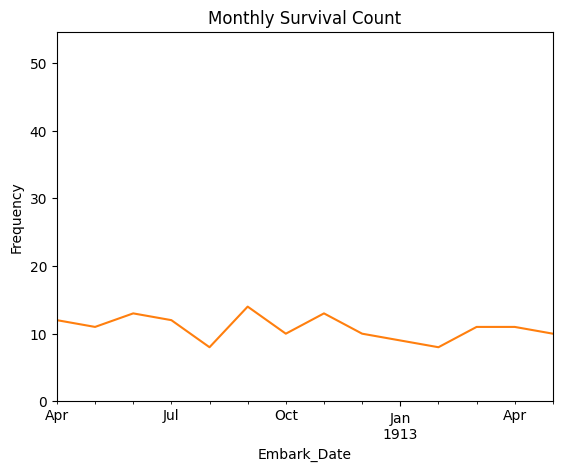

In [80]:
# Plotting the distribution of ages
titanic_df['Age'].plot(kind='hist', title='Age Distribution', bins=20)
# plt.show()

# Bar plot of survival rate by class
titanic_df.groupby('Pclass', observed=False)['Survived'].mean().plot(kind='bar', title='Survival Rate by Class')
# plt.show()

# Line plot of monthly survival count (requires Embark_Date as index)
monthly_survival.plot(kind='line', title='Monthly Survival Count')
plt.show()
